In [48]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [49]:
data = pd.read_csv("thermal2700.csv")
data.head()

,compound,sg,Eg (eV),kL,natoms,density,volume,bulkmod,avgcn,gamma
0,La1O4V1,14,3.50,9.82,24,4.82,349.6,89.8,1.92,0.50
1,La1O4V1,141,3.15,12.41,12,4.42,190.9,97.3,3.92,0.73
2,In1O3Y1,185,2.02,6.27,30,5.67,442.3,137.2,4.53,0.96
3,Ba2In2O5,46,0.93,8.07,18,6.10,318.3,89.4,3.56,0.59
4,K6Mg1O4,186,1.71,2.20,22,2.53,424.3,31.7,5.59,1.35


In [50]:
data = data.drop(labels='compound', axis = 1)
data.head()

,sg,Eg (eV),kL,natoms,density,volume,bulkmod,avgcn,gamma
0,14,3.50,9.82,24,4.82,349.6,89.8,1.92,0.50
1,141,3.15,12.41,12,4.42,190.9,97.3,3.92,0.73
2,185,2.02,6.27,30,5.67,442.3,137.2,4.53,0.96
3,46,0.93,8.07,18,6.10,318.3,89.4,3.56,0.59
4,186,1.71,2.20,22,2.53,424.3,31.7,5.59,1.35


In [51]:
categorical_features = ['sg']
continous_features = ['Eg (eV)','kL','natoms','density','volume','bulkmod','avgcn','gamma']

In [52]:
data[continous_features].describe()

,Eg (eV),kL,natoms,density,volume,bulkmod,avgcn,gamma
count,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000
mean,1.677800,9.729174,14.901481,4.478119,327.813848,62.298000,5.021941,1.135407
std,1.276622,38.192546,8.942030,1.458460,242.631182,59.268468,1.887323,0.599221
min,0.000000,0.080000,2.000000,0.890000,11.000000,0.300000,1.000000,0.500000
25%,0.720000,1.450000,8.000000,3.490000,158.575000,24.675000,4.000000,0.760000
50%,1.370000,3.240000,14.000000,4.300000,259.850000,48.100000,4.570000,0.980000
75%,2.280000,7.300000,22.000000,5.302500,441.600000,77.900000,5.880000,1.450000
max,7.450000,1079.910000,48.000000,12.470000,1634.000000,1163.500000,15.000000,3.890000


In [53]:
set(data['sg'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 31,
 33,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 46,
 47,
 48,
 50,
 51,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 74,
 81,
 82,
 84,
 85,
 87,
 88,
 92,
 95,
 96,
 98,
 99,
 100,
 102,
 105,
 107,
 108,
 109,
 111,
 112,
 113,
 114,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 125,
 126,
 127,
 129,
 131,
 132,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 150,
 152,
 154,
 155,
 156,
 159,
 160,
 161,
 162,
 164,
 166,
 167,
 169,
 170,
 173,
 174,
 176,
 180,
 181,
 182,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 197,
 198,
 199,
 204,
 205,
 206,
 208,
 212,
 213,
 214,
 215,
 216,
 217,
 220,
 221,
 223,
 224,
 225,
 227}

In [54]:
# To use the categorical features, we need to convert the categorical features 
#to binary using pandas get dummies
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    print(dummies.head())
    data1 = pd.concat([data, dummies], axis=1)
    data1.drop(col, axis=1, inplace=True)
data1.head()

   sg_1  sg_2  sg_3  sg_4  sg_5  sg_6  sg_7  sg_8  sg_9  sg_10  ...  sg_214  \
0     0     0     0     0     0     0     0     0     0      0  ...       0   
1     0     0     0     0     0     0     0     0     0      0  ...       0   
2     0     0     0     0     0     0     0     0     0      0  ...       0   
3     0     0     0     0     0     0     0     0     0      0  ...       0   
4     0     0     0     0     0     0     0     0     0      0  ...       0   

   sg_215  sg_216  sg_217  sg_220  sg_221  sg_223  sg_224  sg_225  sg_227  
0       0       0       0       0       0       0       0       0       0  
1       0       0       0       0       0       0       0       0       0  
2       0       0       0       0       0       0       0       0       0  
3       0       0       0       0       0       0       0       0       0  
4       0       0       0       0       0       0       0       0       0  

[5 rows x 160 columns]


,Eg (eV),kL,natoms,density,volume,bulkmod,avgcn,gamma,sg_1,sg_2,...,sg_214,sg_215,sg_216,sg_217,sg_220,sg_221,sg_223,sg_224,sg_225,sg_227
0,3.50,9.82,24,4.82,349.6,89.8,1.92,0.50,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.15,12.41,12,4.42,190.9,97.3,3.92,0.73,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.02,6.27,30,5.67,442.3,137.2,4.53,0.96,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.93,8.07,18,6.10,318.3,89.4,3.56,0.59,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.71,2.20,22,2.53,424.3,31.7,5.59,1.35,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# To give equal importance to all features, we need to scale the continuous features
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)
pd.DataFrame(data_transformed)

,0,1,2,3,4,5,6,7,8
0,0.057522,0.469799,0.009020,0.478261,0.339378,0.208626,0.076943,0.065714,0.000000
1,0.619469,0.422819,0.011418,0.217391,0.304836,0.110844,0.083391,0.208571,0.067847
2,0.814159,0.271141,0.005732,0.608696,0.412781,0.265742,0.117693,0.252143,0.135693
3,0.199115,0.124832,0.007399,0.347826,0.449914,0.189341,0.076599,0.182857,0.026549
4,0.818584,0.229530,0.001963,0.434783,0.141623,0.254652,0.026994,0.327857,0.250737
...,...,...,...,...,...,...,...,...,...
2695,0.530973,0.021477,0.005519,0.130435,0.395509,0.110906,0.047713,0.205714,0.061947
2696,0.132743,0.103356,0.004399,0.304348,0.374784,0.221670,0.046510,0.182857,0.026549
2697,0.132743,0.119463,0.004112,0.304348,0.360967,0.188460,0.055450,0.214286,0.076696
2698,0.132743,0.048322,0.002778,0.304348,0.437824,0.223635,0.045822,0.214286,0.076696


In [56]:
km = KMeans(n_clusters=3)
km = km.fit(data_transformed)
km.inertia_ #Sum of squared distances of samples to their closest cluster center
km.cluster_centers_
km.labels_


array([0, 1, 1, ..., 0, 0, 0])

In [57]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    

C:\Users\rjgle\anaconda3\envs\bigdata\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


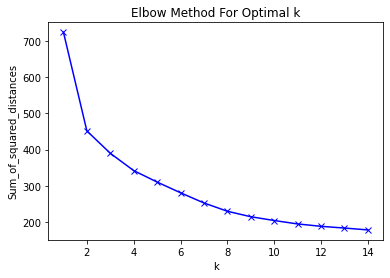

In [58]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
#best K is at the elbow position.  K=7.


In [59]:
n_clusters=9
km = KMeans(n_clusters=9)
km = km.fit(data_transformed)
km.inertia_ #Sum of squared distances of samples to their closest cluster center
km.cluster_centers_
km.labels_
cluster_labels=km.labels_

In [60]:
#visulization of the clusters. 
#First need to project the sample into 2D or 3D dimension. 
#we use t-sne
import numpy as np
from sklearn.manifold import TSNE
X=data_transformed
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(X)


In [61]:
print(X_embedded)
X_embedded.shape
X=X_embedded


[[ 24.196722   23.755178 ]
 [ 13.418342  -21.217457 ]
 [  5.949585   -6.936292 ]
 ...
 [ -3.0867696  19.273384 ]
 [ -3.3682582  17.450436 ]
 [ -3.1964104  19.260048 ]]


Text(0, 0.5, 'Feature space for the 2nd feature')

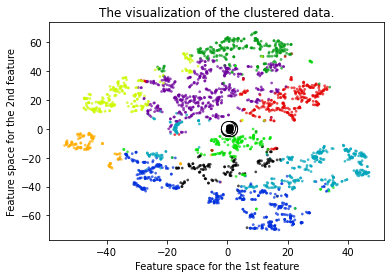

In [62]:
fig, (ax1) = plt.subplots(1, 1)
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax1.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = km.cluster_centers_
# Draw white circles at cluster centers
ax1.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax1.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax1.set_title("The visualization of the clustered data.")
ax1.set_xlabel("Feature space for the 1st feature")
ax1.set_ylabel("Feature space for the 2nd feature")

In [63]:
#want to draw the cluster labels at cluster center using openTSNE

from openTSNE import TSNE as OTSNE
x_train=data_transformed
tsne = OTSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)
embedding_train = tsne.fit(x_train)
X=embedding_train

--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.38 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=12.00, lr=225.00 for 250 iterations...
Iteration   50, KL divergence 3.6209, 50 iterations in 0.1450 sec
Iteration  100, KL divergence 3.4120, 50 iterations in 0.1490 sec
Iteration  150, KL divergence 3.3916, 50 iterations in 0.1520 sec
Iteration  200, KL divergence 3.3854, 50 iterations in 0.1510 sec
Iteration  250, KL divergence 3.3826, 50 iterations in 0.1570 sec
   --> Time elapsed: 0.75 seconds
===> Running optimization with exaggeration=1.00, lr=225.00 for 500 i

In [64]:
centers = km.cluster_centers_
print(centers.shape)
centersT = embedding_train.transform(centers)
centers = centersT

(9, 9)
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 43.4275, 50 iterations in 0.0730 sec
Iteration  100, KL divergence 42.2801, 50 iterations in 0.0740 sec
Iteration  150, KL divergence 41.3932, 50 iterations in 0.0760 sec
Iteration  200, KL divergence 40.7318, 50 iterations in 0.0750 sec
Iteration  250, KL divergence 40.0931, 50 iterations in 0.0760 sec
   --> Time elapsed: 0.38 seconds


Text(0, 0.5, 'Feature space for the 2nd feature')

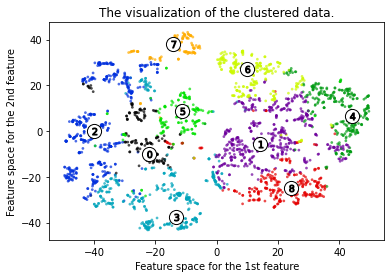

In [65]:
fig, (ax1) = plt.subplots(1, 1)
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax1.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
# Draw white circles at cluster centers
ax1.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax1.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax1.set_title("The visualization of the clustered data.")
ax1.set_xlabel("Feature space for the 1st feature")
ax1.set_ylabel("Feature space for the 2nd feature")

In [ ]:
#It's hard to tell the best cluster number by the elbow method but I believe it's 9